### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : numeraire_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/numeraire_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,20.87,23.62,18.91,21.53,"349,885","26,115,800"
1,2017-09-04,26.91,27.34,17.99,20.74,"716,231","33,673,500"
2,2017-09-03,27.70,29.36,24.99,26.90,"493,926","34,662,300"
3,2017-09-02,32.49,33.01,26.79,27.24,"633,861","40,658,600"
4,2017-09-01,35.67,35.90,31.35,32.45,"1,024,920","44,636,600"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-09-05 to 2017-08-07
Data columns (total 6 columns):
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null object
Market Cap    30 non-null object
dtypes: float64(4), object(2)
memory usage: 1.6+ KB


- The data frame has 30 entries and 6 columns. 
- All columns has 30 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.

Solution:
- Convert to float number

In [7]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [8]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-09-05 to 2017-08-07
Data columns (total 6 columns):
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null int64
Market Cap    30 non-null int64
dtypes: float64(4), int64(2)
memory usage: 2.9 KB


In [9]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,33.311333,36.487333,30.395667,33.009667,9.233835e+05,4.166209e+07
std,4.740261,5.773530,4.509950,5.114229,7.136879e+05,6.007867e+06
min,20.870000,23.620000,17.990000,20.740000,3.498850e+05,2.611580e+07
25%,29.447500,33.755000,26.790000,29.737500,4.721230e+05,3.689638e+07
50%,34.800000,36.925000,31.895000,34.745000,6.750460e+05,4.359285e+07
75%,35.560000,38.277500,33.525000,35.590000,9.848892e+05,4.454140e+07
max,43.830000,48.730000,34.850000,43.370000,3.202390e+06,5.491300e+07


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
df1.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

All data is clear

#### 4. Data Visualization

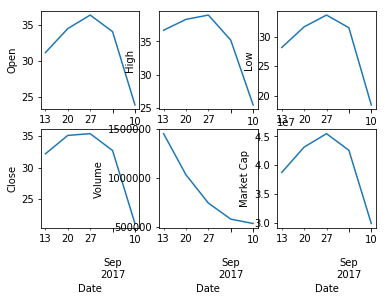

In [11]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()